# SciPy
![SciPy](https://raw.githubusercontent.com/scipy/scipy-sphinx-theme/master/_static/scipyshiny_small.png)

- Uses numpy as its core
- Numerical methods for 
    - integration
    - solving differential equations
    - optimizing, minimizing 
    - root finding
    - fast fourier transforms
    
- Contains the CODATA values for many constants of nature
- Mostly build as wrappers around time-proven fortran libraries (fftpack, lapack, fitpack)

In [37]:
import scipy as sp

# we will need to plot stuff later
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

## Physical constants

In [38]:
import scipy.constants as const
const.epsilon_0

8.854187817620389e-12

In [39]:
# convert temperatures:
const.convert_temperature(100, old_scale='C', new_scale='K')

373.14999999999998

In [10]:
# more constants (including units and errors)!
for k, v in const.physical_constants.items():
    print(k, ':', v)

Wien displacement law constant : (0.0028977685, 'm K', 5.1e-09)
atomic unit of 1st hyperpolarizablity : (3.20636151e-53, 'C^3 m^3 J^-2', 2.8e-60)
atomic unit of 2nd hyperpolarizablity : (6.2353808e-65, 'C^4 m^4 J^-3', 1.1e-71)
atomic unit of electric dipole moment : (8.47835309e-30, 'C m', 7.3e-37)
atomic unit of electric polarizablity : (1.648777274e-41, 'C^2 m^2 J^-1', 1.6e-49)
atomic unit of electric quadrupole moment : (4.48655124e-40, 'C m^2', 3.9e-47)
atomic unit of magn. dipole moment : (1.8548019e-23, 'J T^-1', 1.6e-30)
atomic unit of magn. flux density : (235051.755, 'T', 0.0014)
deuteron magn. moment : (4.33073482e-27, 'J T^-1', 3.8e-34)
deuteron magn. moment to Bohr magneton ratio : (0.0004669754567, '', 5e-12)
deuteron magn. moment to nuclear magneton ratio : (0.8574382329, '', 9.2e-09)
deuteron-electron magn. moment ratio : (-0.0004664345548, '', 5e-12)
deuteron-proton magn. moment ratio : (0.3070122084, '', 4.5e-09)
deuteron-neutron magn. moment ratio : (-0.44820652, '', 

In [12]:
val, unit, uncertainty = const.physical_constants['muon mass energy equivalent in MeV']

val, unit, uncertainty

(105.6583745, 'MeV', 2.4e-06)

# Fitting

### curve_fit

least-squares with Levenberg-Marquardt numerical minimization

In [43]:
from scipy.optimize import curve_fit


x = np.linspace(0, 1, 100)
y = np.exp(- 4 * x) + 5 + np.random.normal(0, 0.2, 100)


def f(x, a, b):
    return np.exp(a * x) + b


params, covariance_matrix = curve_fit(f, x, y)

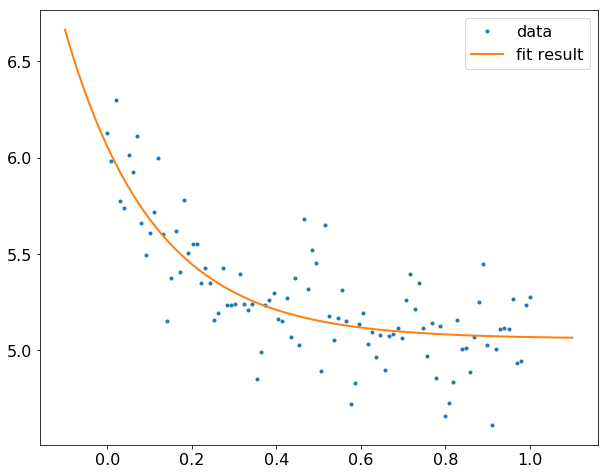

In [41]:
x_plot = np.linspace(-0.1, 1.1, 1000)

plt.plot(x, y, '.', label='data')
plt.plot(x_plot, f(x_plot, *params), label='fit result')
plt.legend()

## Providing uncertainties and initial guesses

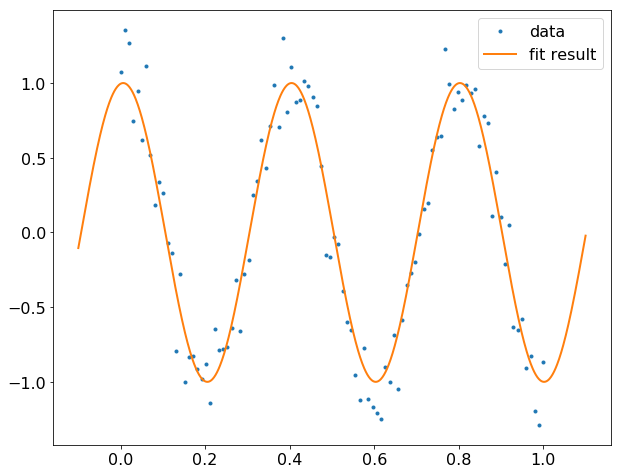

In [56]:
x = np.linspace(0, 1, 100)
y = np.sin(5 * np.pi * x + np.pi / 2) 
yerr = np.full_like(y, 0.2)

noise = np.random.normal(0, yerr, 100)

y += noise

def f(x, a, b):
    return np.sin(a * x + b)


#params, covariance_matrix = curve_fit(f, x, y)

#params, covariance_matrix = curve_fit(
#    f, x, y,
#    p0=[12, 1],
#)

params, covariance_matrix = curve_fit(
    f, x, y,
    p0=[15, 1.5],
    sigma=yerr,
    absolute_sigma=True,
)


# plot the stuff

x_plot = np.linspace(-0.1, 1.1, 1000)

plt.plot(x, y, '.', label='data')
plt.plot(x_plot, f(x_plot, *params), label='fit result')
plt.legend()

### Plot the correlation maxtrix

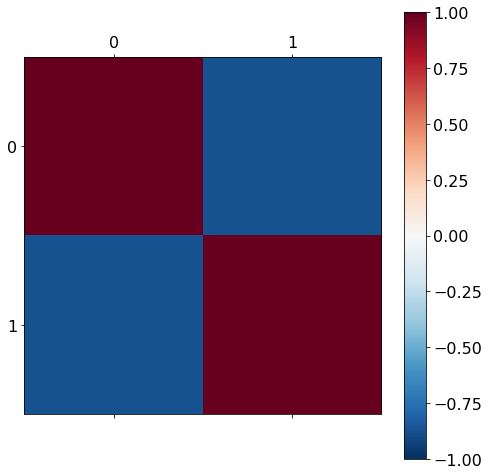

In [63]:
D = np.diag(1 / np.sqrt(np.diag(covariance_matrix)))

correlation_matrix = D @ covariance_matrix @ D


plt.matshow(correlation_matrix, vmin=-1, vmax=1, cmap='RdBu_r')
plt.colorbar()

## Unbinned likelihood fits using scipy.minize

## FFTs

In [123]:
t = np.linspace(0, 1, 1024 * 10)
y = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 50 * t)

# add some white noise
y += np.random.normal(y, 5)

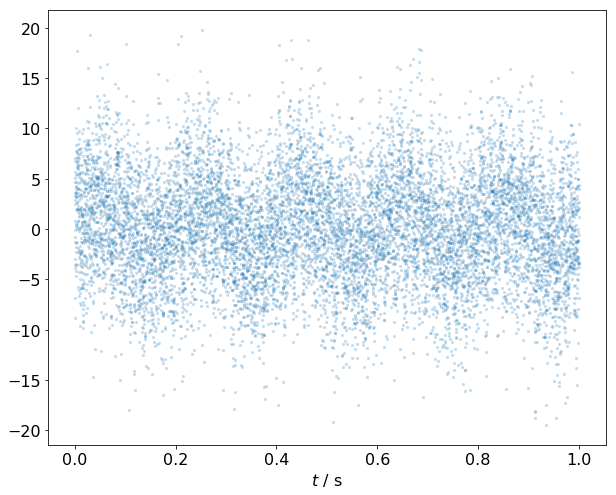

In [130]:
plt.scatter(t, y, s=10, alpha=0.25, lw=0)
plt.xlabel(r'$t \ /\ \mathrm{s}$')

In [125]:
from scipy import fftpack

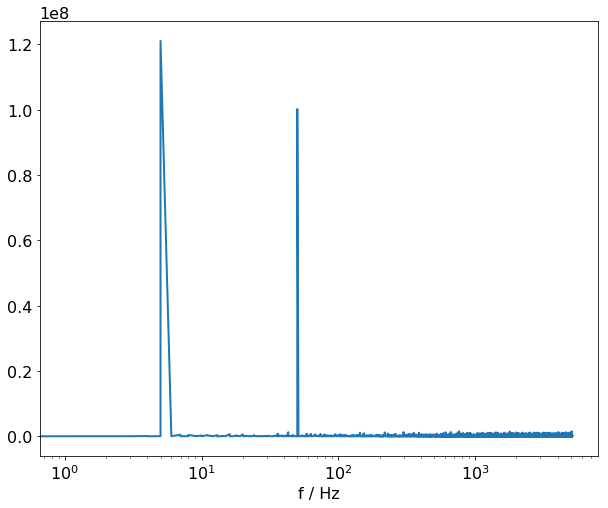

In [126]:
z = fftpack.rfft(y)
f = fftpack.rfftfreq(len(t), t[1] - t[0])

plt.plot(f, np.abs(z)**2)
plt.xlabel('f / Hz')
plt.xscale('log')
# plt.yscale('log')